<a href="https://colab.research.google.com/github/Ha-eunYu/Section_Project/blob/main/Sectin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Section1 Project**

다음 분기에 어떤 게임을 설계해야 할까

##Data Description
* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

##Q
* 지역에 따라서 선호하는 게임 장르가 다를까
* 연도별 게임의 트렌드가 있을까 
* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler as std_sc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [3]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [4]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (2).csv


In [5]:
df=pd.read_csv('vgames2.csv')
df0=df.copy()
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df=df.iloc[:,1:]

In [14]:
df.duplicated().sum()

0

In [13]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [16]:
df['Name'].duplicated().sum()

5104

In [17]:
271/16598
50/16598
58/16598

0.003494396915290999

In [72]:
df[df.Publisher=='Activision'].groupby(['Genre']).sum()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum
Genre,,,,,,
Action,616424.0,86.48,39.47,1.08,13.59,140.62
Adventure,50199.0,4.04,0.87,0.10,0.41,5.42
Fighting,13987.0,1.94,0.76,0.00,0.15,2.85
Misc,206824.0,48.68,17.63,0.05,10.07,76.43
Platform,120328.0,23.45,7.85,0.07,2.01,33.38
Puzzle,14005.0,0.78,0.11,0.15,0.02,1.06
Racing,146476.0,11.88,3.64,0.04,1.35,16.91
Role-Playing,82279.0,23.58,18.40,0.26,4.55,46.79
Shooter,309286.0,159.05,96.86,4.64,34.65,295.20


In [18]:
# 전체 16598개 데이터 중 Publisher 에 50개 오류값
df[df['Publisher'].isnull()]
df['Publisher'].value_counts()
# Publisher 중복되는 값들이 존재

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 578, dtype: int64

In [19]:
# Publisher NaN
missing_p=df[df['Publisher'].isnull()]
missing_p[missing_p.duplicated('Name')] #missing_p.duplicated('Publishe').sum()
id = missing_p['Name'].unique()
id.shape
# Publisher 존재
p0=df.copy()
p0=p0.dropna(subset=['Publisher'])
# 동일 Name 존재 여부
have=[]
for data in p0['Name']:
    if data in id:
        have.append(data)
len(have)

11

In [20]:
pi=[]
ind=[]
# g00=[]
for n in have:
  if p0[p0['Name']==n]['Publisher'].unique().size==1:
    if p0[p0['Name']==n]['Genre'].unique().size==1:
      ind.append(p0[p0['Name']==n]['Name'].index)
      pi.append(p0[p0['Name']==n]['Name'].values)
      # g00.append(g0[g0['Name']==n]['Name'])

In [21]:
# Genre가 존재하는 행에 대한 동일 Name과 index 
pi_list=list(itertools.chain.from_iterable(pi))
ind_list=list(itertools.chain.from_iterable(ind))
df_p = pd.DataFrame({'Index': ind_list, 'Name': pi_list})
# df_y[df_y.duplicated()]
df_p.drop_duplicates(['Index'], keep='first').shape
df_p.drop_duplicates(['Name'], keep='first').shape

(7, 2)

In [22]:
# 7개만 존재하므로 그냥 삭제
df=df.dropna(subset=['Publisher'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16539 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16539 non-null  object 
 1   Platform     16539 non-null  object 
 2   Year         16291 non-null  float64
 3   Genre        16489 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16539 non-null  object 
 6   EU_Sales     16539 non-null  object 
 7   JP_Sales     16539 non-null  object 
 8   Other_Sales  16539 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


# **지역에 따라서 선호하는 게임 장르가 다를까**

In [23]:
# 전체 16598개 데이터 중 Genre에 50개 NaN
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16539 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16539 non-null  object 
 1   Platform     16539 non-null  object 
 2   Year         16291 non-null  float64
 3   Genre        16489 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16539 non-null  object 
 6   EU_Sales     16539 non-null  object 
 7   JP_Sales     16539 non-null  object 
 8   Other_Sales  16539 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


Name             0
Platform         0
Year           248
Genre           50
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [24]:
# Genre NaN
missing_g=df[df['Genre'].isnull()]
missing_g[missing_g.duplicated('Name')] #missing_g.duplicated('Name').sum()
# id = missing_g['Name'].unique()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [25]:
# Genre 존재
g0=df.copy()
g0=g0.dropna(subset=['Genre'])
# 동일 Name 존재 여부
have=[]
for data in g0['Name']:
    if data in id:
        have.append(data)
len(have)

11

In [26]:
gi=[]
ind=[]
# g00=[]
for n in have:
  if g0[g0['Name']==n]['Publisher'].unique().size==1:
    if g0[g0['Name']==n]['Genre'].unique().size==1:
      ind.append(g0[g0['Name']==n]['Name'].index)
      gi.append(g0[g0['Name']==n]['Name'].values)
      # g00.append(g0[g0['Name']==n]['Name'])

In [27]:
# Genre가 존재하는 행에 대한 동일 Name과 index 
gi_list=list(itertools.chain.from_iterable(gi))
ind_list=list(itertools.chain.from_iterable(ind))
df_g = pd.DataFrame({'Index': ind_list, 'Name': gi_list})
# df_y[df_y.duplicated()]
df_g.drop_duplicates(['Index'], keep='first').shape
df_g.drop_duplicates(['Name'], keep='first').shape

(7, 2)

In [28]:
df=df.dropna(subset=['Genre'])

In [29]:
df['NA_Sales'] = df['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Sum'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [20]:
# q1df=df.iloc[:,[4,6,7,8,9]]
# q1df.sort_values('Genre')
# q1df.stack()
# q1df.pivot(index='Genre', columns=['Na_Sales','EU_Sales','JP_Sales','Other_Sales'])
# pd.crosstab(q1df.Marital_Status,df.Country)
# pd.crosstab(q1df.Country, df.Marital_Status,margins=True,normalize='index')
# df['a'] = df['a'].astype(float)
# q1df.astype({'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'}).dtypes
# df.groupby('Genre')
# df.sort_values(by='Other_Sales')
# df['Sum'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
# q1=df.loc[:,['Genre','NA_Sales','EU_Sales','Other_Sales']]
# q1.groupby(['Genre']).size()
# pd.melt(q1, id_vars=['Genre','NA_Sales'])
# q1.set_index('Genre', inplace=True)
# q1.stack()
# df.groupby(['Year', 'Genre']).sum()

In [30]:
g_n=df.groupby(['Genre'])['NA_Sales'].sum()
g_e=df.groupby(['Genre'])['EU_Sales'].sum()
g_j=df.groupby(['Genre'])['JP_Sales'].sum()
g_o=df.groupby(['Genre'])['Other_Sales'].sum()
g=pd.DataFrame()
g=g.append(g_n)
g=g.append(g_e)
g=g.append(g_j)
g=g.append(g_o)

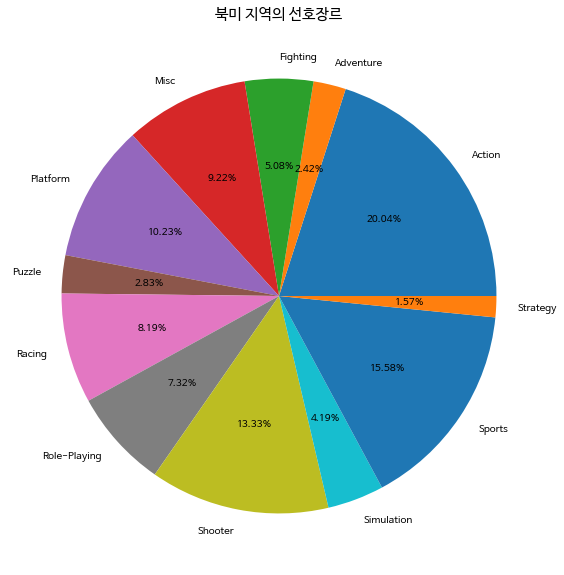

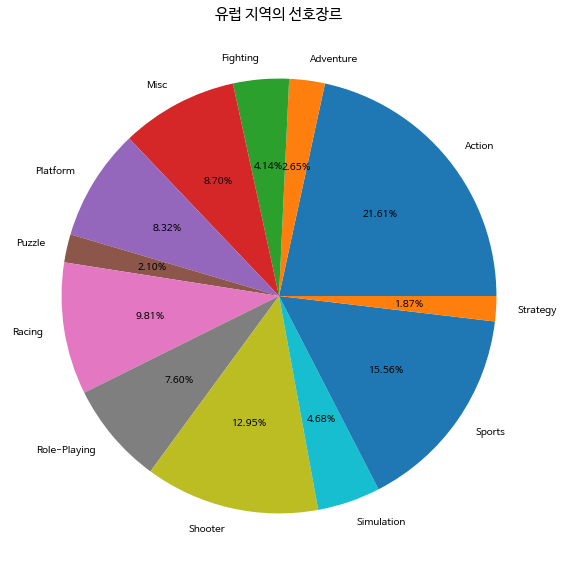

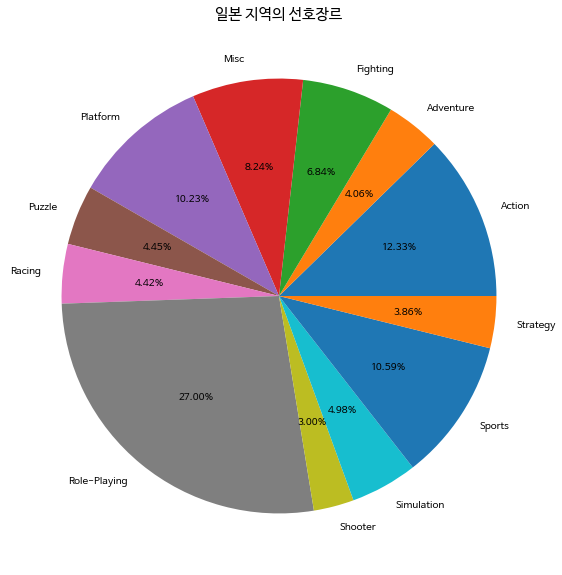

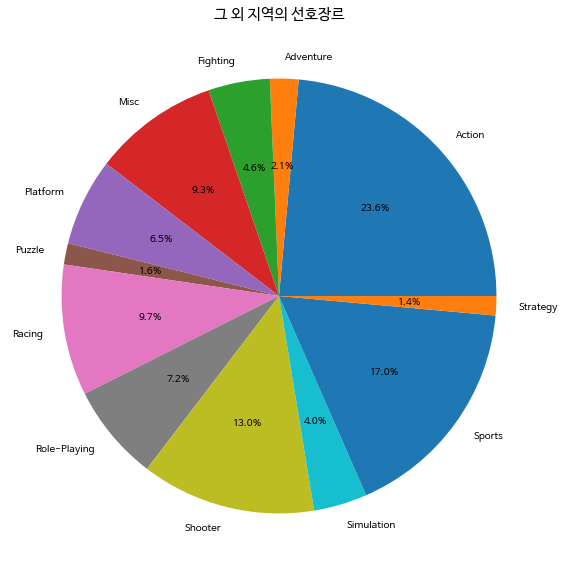

In [31]:
pie_locate=g
pie_label=pie_locate.columns.values.tolist()
plt.figure(figsize=(10, 10))
plt.pie(pie_locate.loc['NA_Sales'], labels=pie_label, autopct='%.2f%%');
plt.title('북미 지역의 선호장르',fontsize=15);
plt.figure(figsize=(10, 10))
plt.pie(pie_locate.loc['EU_Sales'], labels=pie_label, autopct='%.2f%%');
plt.title('유럽 지역의 선호장르',fontsize=15);
plt.figure(figsize=(10, 10))
plt.pie(pie_locate.loc['JP_Sales'], labels=pie_label, autopct='%.2f%%');
plt.title('일본 지역의 선호장르',fontsize=15);
plt.figure(figsize=(10, 10))
plt.pie(pie_locate.loc['Other_Sales'], labels=pie_label, autopct='%.1f%%')
plt.title('그 외 지역의 선호장르',fontsize=15);

In [38]:
G=g.T
from scipy.stats import chi2_contingency
# 주어진 하나의 범주형 변수가 특정 예상되는 분포와 동일한 분포를 나타내는지 에 대한 가설 검정 방법
# 귀무가설( H0 ): 주어진 변수 X의 관측분포와 특정 예상 분포가 동일하다.
# 대립가설( Ha ): 주어진 변수 X의 관측분포와 특정 예상 분포가 다르다.
# 귀무가설( H0 ): 국가별 판매량의 빈도가 균일하게 분포되어 있다.
# 대립가설( Ha ): 국가별 선호하는 장르가 다르다.
chi2_val, p, dof, expected= chi2_contingency(G, correction=1)
p

2.7110021232333247e-125

###**p-value: 9.635373883688875e-123; 국가별 선호하는 장르가 다르다**.### 

#**연도별게임트렌드**#

In [39]:
# Year가 NaN인 Name 271개
missing_y = df[df['Year'].isnull()]
id = missing_y['Name'].unique()
# Year 존재하는 데이터
y0 = df.copy()
y0 = y0.dropna(subset=['Year'])
# 동일 Name 존재 여부 확인
have = []
for data in y0['Name']:
    if data in id:
        have.append(data)
len(have)

195

In [40]:
# i=df[df['Year'].isnull()]['Name']==have[0]
# i.sum
# yyyy,n=df[df['Name']==have[0]].Year
df[df['Name']=='Madden NFL 2004']['Year'].unique().size==2
df[df['Name']=='Madden NFL 2004']
df[df['Name']==have[50]]['Publisher'].unique().size==2
df[df['Name']==have[50]]
y0[y0['Name']==have[50]]['Publisher'].unique().size==1
y0[y0['Name']==have[5]]
df[df['Name']==have[5]]
#platform이 다를 수도 있음

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum
729,"The Chronicles of Narnia: The Lion, The Witch ...",DS,2005.0,Action,Disney Interactive Studios,0.15,0.02,0.0,0.01,0.18
1396,"The Chronicles of Narnia: The Lion, The Witch ...",PS2,2005.0,Action,Disney Interactive Studios,0.36,0.01,0.0,0.06,0.43
2444,"The Chronicles of Narnia: The Lion, The Witch ...",XB,2005.0,Action,Disney Interactive Studios,0.15,0.04,0.0,0.01,0.20
3291,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,Disney Interactive Studios,0.48,0.18,0.0,0.01,0.67
13583,"The Chronicles of Narnia: The Lion, The Witch ...",GC,NaN,Action,Disney Interactive Studios,0.22,0.06,0.0,0.01,0.29


In [41]:
# Year가 존재하는 행에 대한 동일 Name; 
import itertools
yi=[]
ind=[]
y00=[]
for n in have:
  if y0[y0['Name']==n]['Publisher'].unique().size==1:
    if y0[y0['Name']==n]['Year'].unique().size==1:
      ind.append(y0[y0['Name']==n]['Name'].index)
      yi.append(y0[y0['Name']==n]['Name'].values)
      # y00.append(y0[y0['Name']==n]['Name'])

In [42]:
# Year가 존재하는 행에 대한 동일 Name과 index 
yi_list=list(itertools.chain.from_iterable(yi))
ind_list=list(itertools.chain.from_iterable(ind))
df_y = pd.DataFrame({'Index': ind_list, 'Name': yi_list})
# df_y[df_y.duplicated()]
df_y.drop_duplicates(['Index'], keep='first').shape
df_y.drop_duplicates(['Name'], keep='first').shape #(83, 2)

(79, 2)

In [43]:
# 전체 16598개 데이터 중 연도에 NaN 삭제
df[df['Year'].isnull()]
df=df.dropna(subset=['Year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


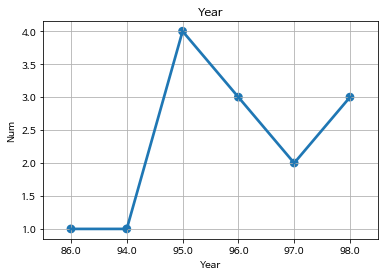

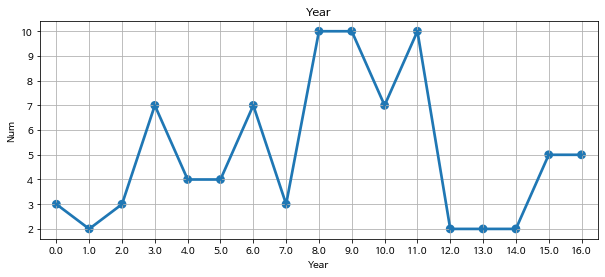

In [44]:
df.sort_values(by='Year')
# 'Ysar'에 0.0 1.0 등이 확인
y=df['Year'].value_counts()
yy=y[y.index<=1000]
# fig, ax = plt.subplots(ncols=2)
sns.pointplot(yy[yy.index>=80].index,yy[yy.index>=80]);plt.grid();plt.title('Year');plt.ylabel('Num');plt.xlabel('Year');
plt.figure(figsize=(10, 4))
sns.pointplot(yy[yy.index<=80].index,yy[yy.index<=80]);plt.grid();plt.title('Year');plt.ylabel('Num');plt.xlabel('Year');

In [45]:
# 연도가 두 자리수로 되어 있는 항목 수정
y=df['Year'].value_counts()
yy=y[y.index<=100].index
dfyy=df.copy()
for i in  range(len(yy)):
  idx=df[df['Year']==yy[i]].index
  if yy[i] > 80:
    df.loc[idx,'Year']=yy[i]+1900
  else: 
    df.loc[idx,'Year']=yy[i]+2000

In [46]:
idx=df0[df0['Year']<1000].index
df.loc[idx]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum
74,Age of Empires III: Complete Collection,PC,2009.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16
81,Treasures of the Deep,PS,1997.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18
213,NASCAR Unleashed,PS3,2011.0,Racing,Activision,0.09,0.00,0.00,0.01,0.10
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015.0,Action,Little Orbit,0.00,0.02,0.00,0.00,0.02
768,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08
...,...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,1994.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00,0.02
16103,Fab 5 Soccer,DS,2008.0,Sports,Destineer,0.01,0.00,0.00,0.00,0.01
16149,Dragon Ball Z: Burst Limit,X360,2008.0,Fighting,Atari,0.24,0.18,0.03,0.05,0.50
16394,Point Blank 3,PS,2000.0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00,0.02


In [47]:
df.groupby(['Year', 'Genre']).size()

Year    Genre       
1980.0  Action           1
        Fighting         1
        Misc             4
        Shooter          2
1981.0  Action          25
                        ..
2016.0  Sports          38
        Strategy        10
2017.0  Action           1
        Role-Playing     2
2020.0  Simulation       1
Length: 388, dtype: int64

In [48]:
# 연도별 출시 게임 장르 수
dfyg=df.groupby(['Year', 'Genre']).size().reset_index(name='Count')
# 최댓값
gmax=dfyg.groupby(['Year'])['Count'].transform(max)==dfyg['Count']
dfyg_max=dfyg[gmax].reset_index(drop=True)
# 중복값
dfyg_max=dfyg_max.drop_duplicates(subset=['Year','Count']).reset_index(drop=True)
dfyg_max.rename(columns={'Count':'Sales'}, inplace = True)
dfyg_max=dfyg_max.iloc[:37,:]

In [49]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

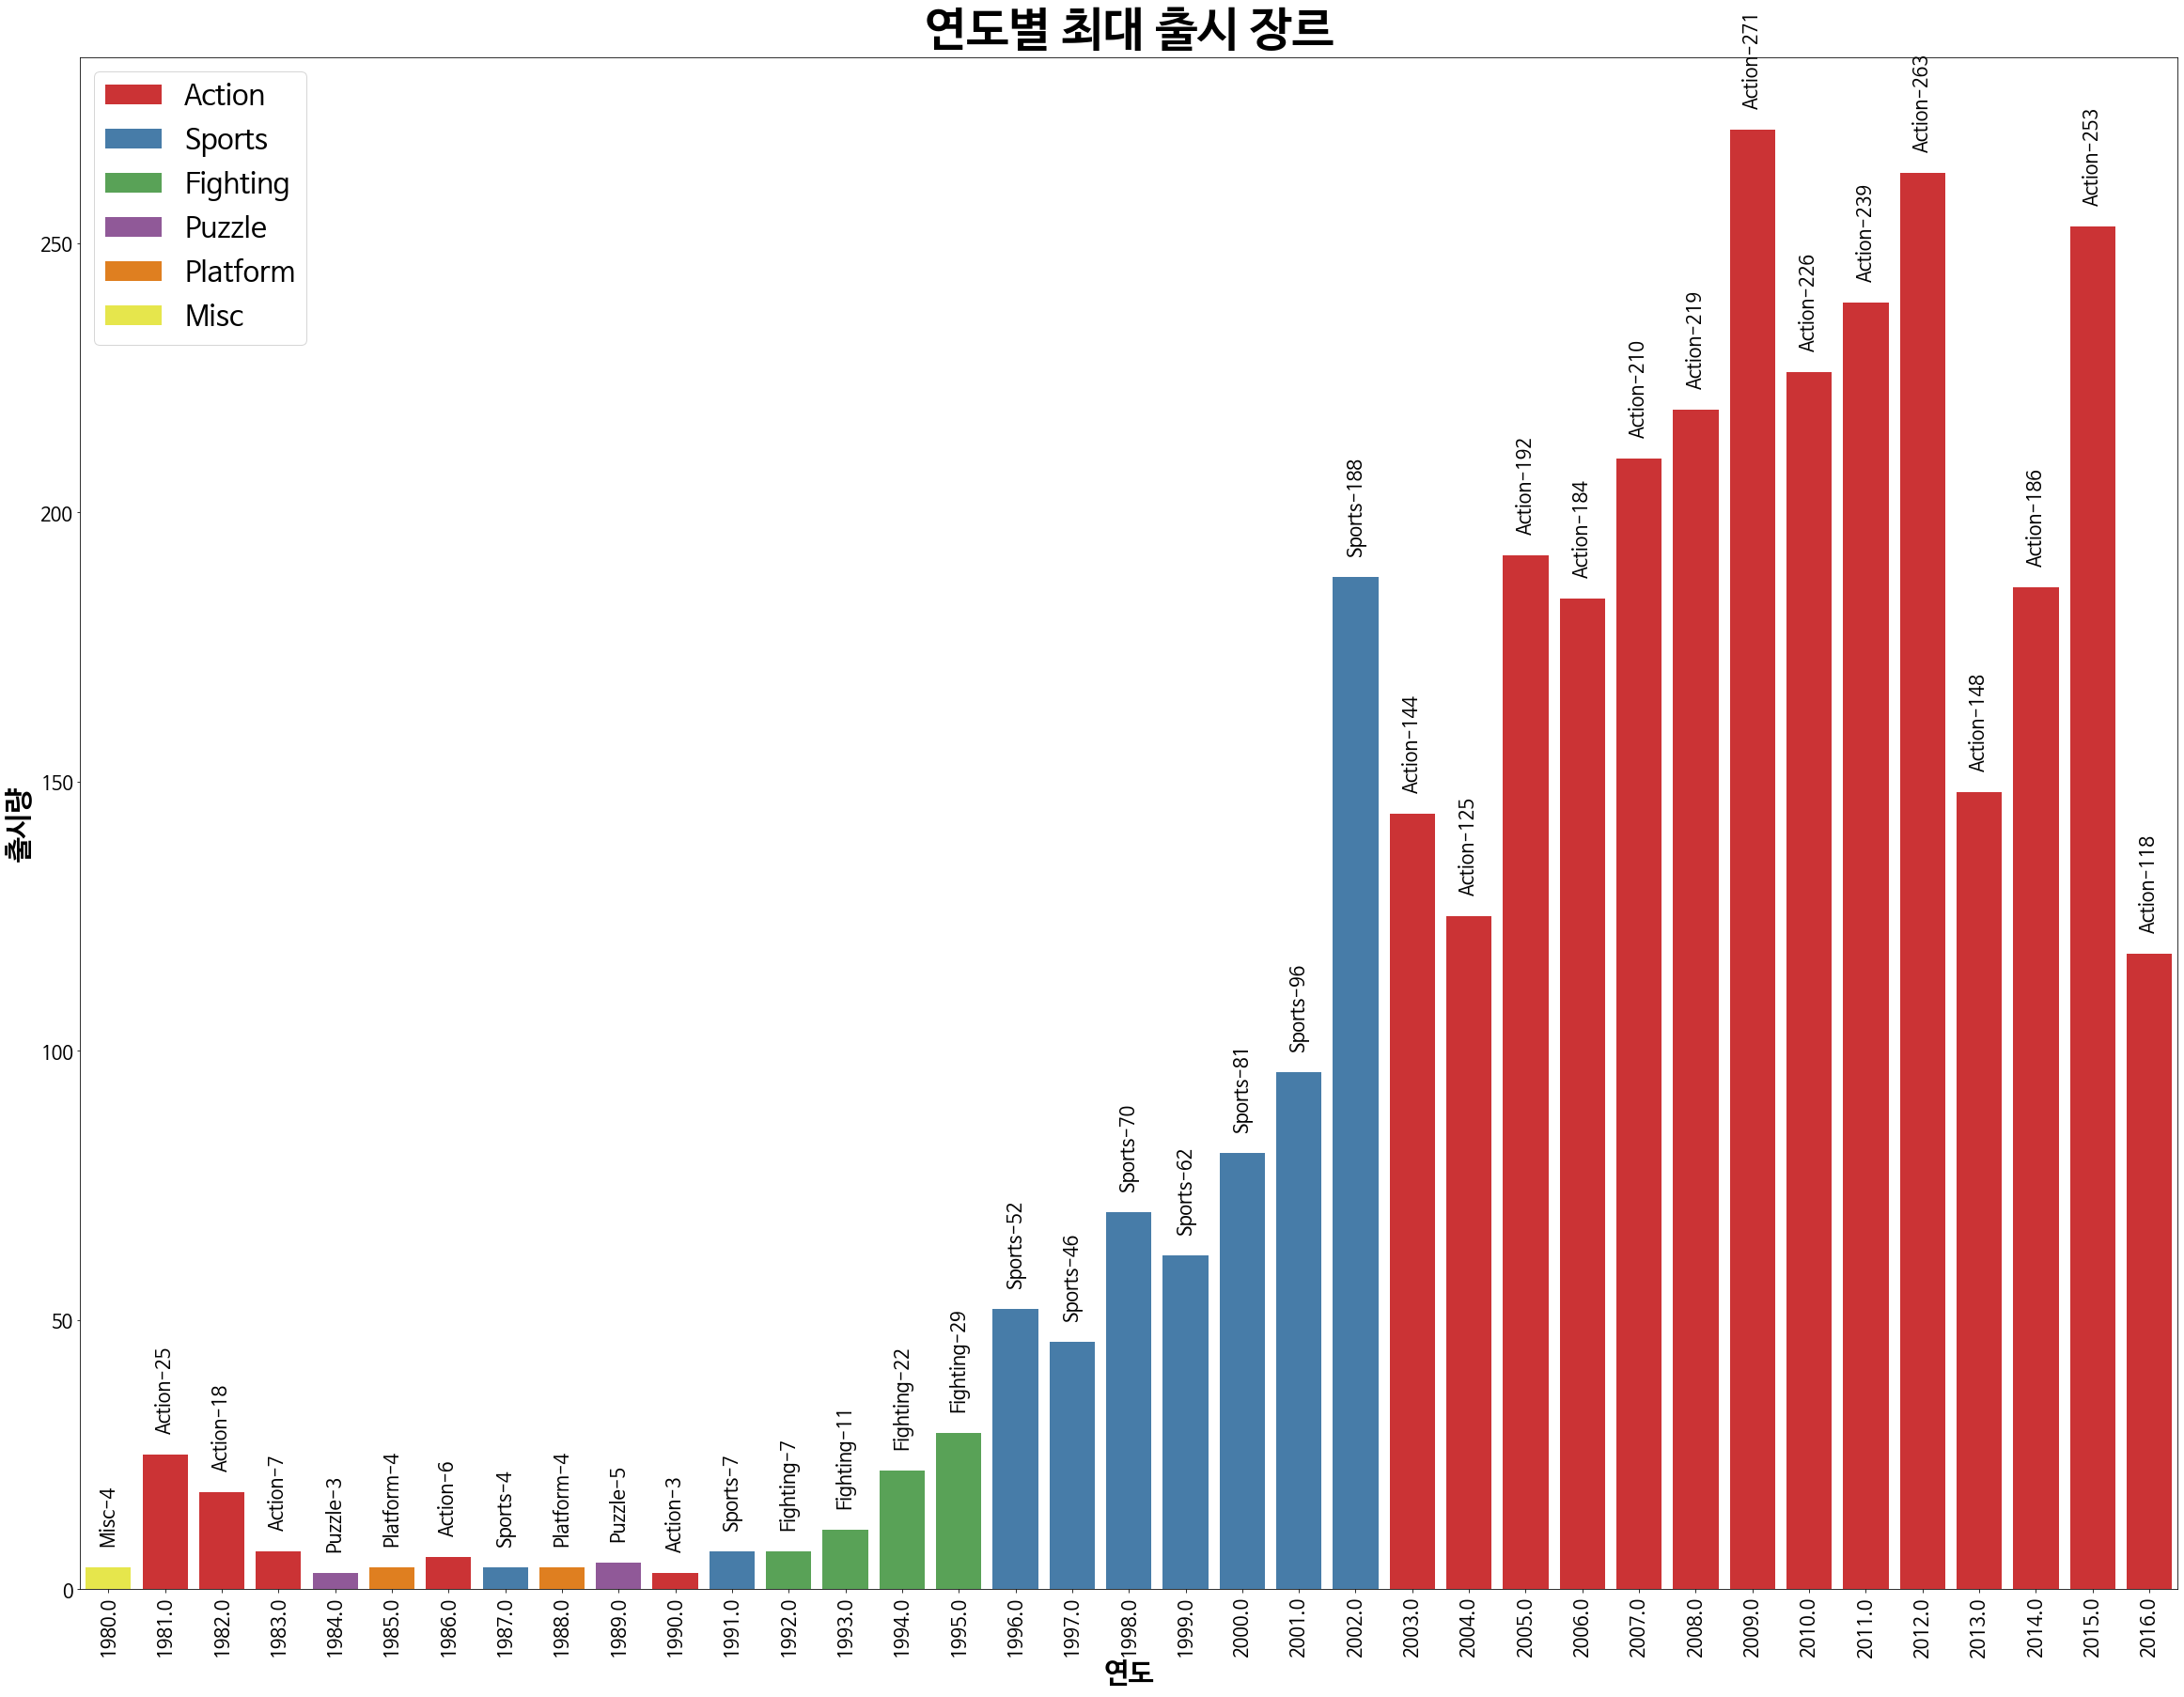

In [50]:
# figure
plt.figure(figsize=(40,30))
custom_palette = sns.color_palette("Set1")
sns.set_palette([custom_palette[0]])
barplot=sns.barplot(x='Year', y='Sales',hue='Genre', data=dfyg_max,hue_order=['Action'])
sns.set_palette([custom_palette[1]])
barplot=sns.barplot(x='Year', y='Sales',hue='Genre', data=dfyg_max,hue_order=['Sports'])
sns.set_palette([custom_palette[2]])
barplot=sns.barplot(x='Year', y='Sales',hue='Genre', data=dfyg_max,hue_order=['Fighting'])
sns.set_palette([custom_palette[3]])
barplot=sns.barplot(x='Year', y='Sales',hue='Genre', data=dfyg_max,hue_order=['Puzzle'])
sns.set_palette([custom_palette[4]])
barplot=sns.barplot(x='Year', y='Sales',hue='Genre', data=dfyg_max,hue_order=['Platform'])
sns.set_palette([custom_palette[5]])
barplot=sns.barplot(x='Year', y='Sales',hue='Genre', data=dfyg_max,hue_order=['Misc'])
plt.legend(loc = 'upper left', prop={'size': 30})

genre=dfyg_max['Genre'].values
cnt = 0
for value in dfyg_max['Sales']:
    barplot.text(x=cnt, y=value + 5, s=str(genre[cnt] + '-' + str(value)),
            color='black', size=20, rotation=90, ha='center')
    cnt+=1
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

plt.title('연도별 최대 출시 장르',weight='bold',fontsize=50);
plt.xlabel('연도',weight='bold',fontsize=30);
plt.ylabel('출시량',weight='bold',fontsize=30);

In [51]:
# 연도별 장르 총매출
dfyg_s=df.groupby(['Year','Genre'])['Sum'].sum().reset_index()
# 최댓값
gmax=dfyg_s.groupby(['Year'])['Sum'].transform(max)==dfyg_s['Sum']
dfyg_s_max=dfyg_s[gmax].reset_index(drop=True)
dfyg_s_max=dfyg_s_max.iloc[:37,:]
dfyg_s_max['Genre'].unique()

array(['Shooter', 'Action', 'Puzzle', 'Platform', 'Fighting',
       'Role-Playing', 'Racing', 'Sports'], dtype=object)

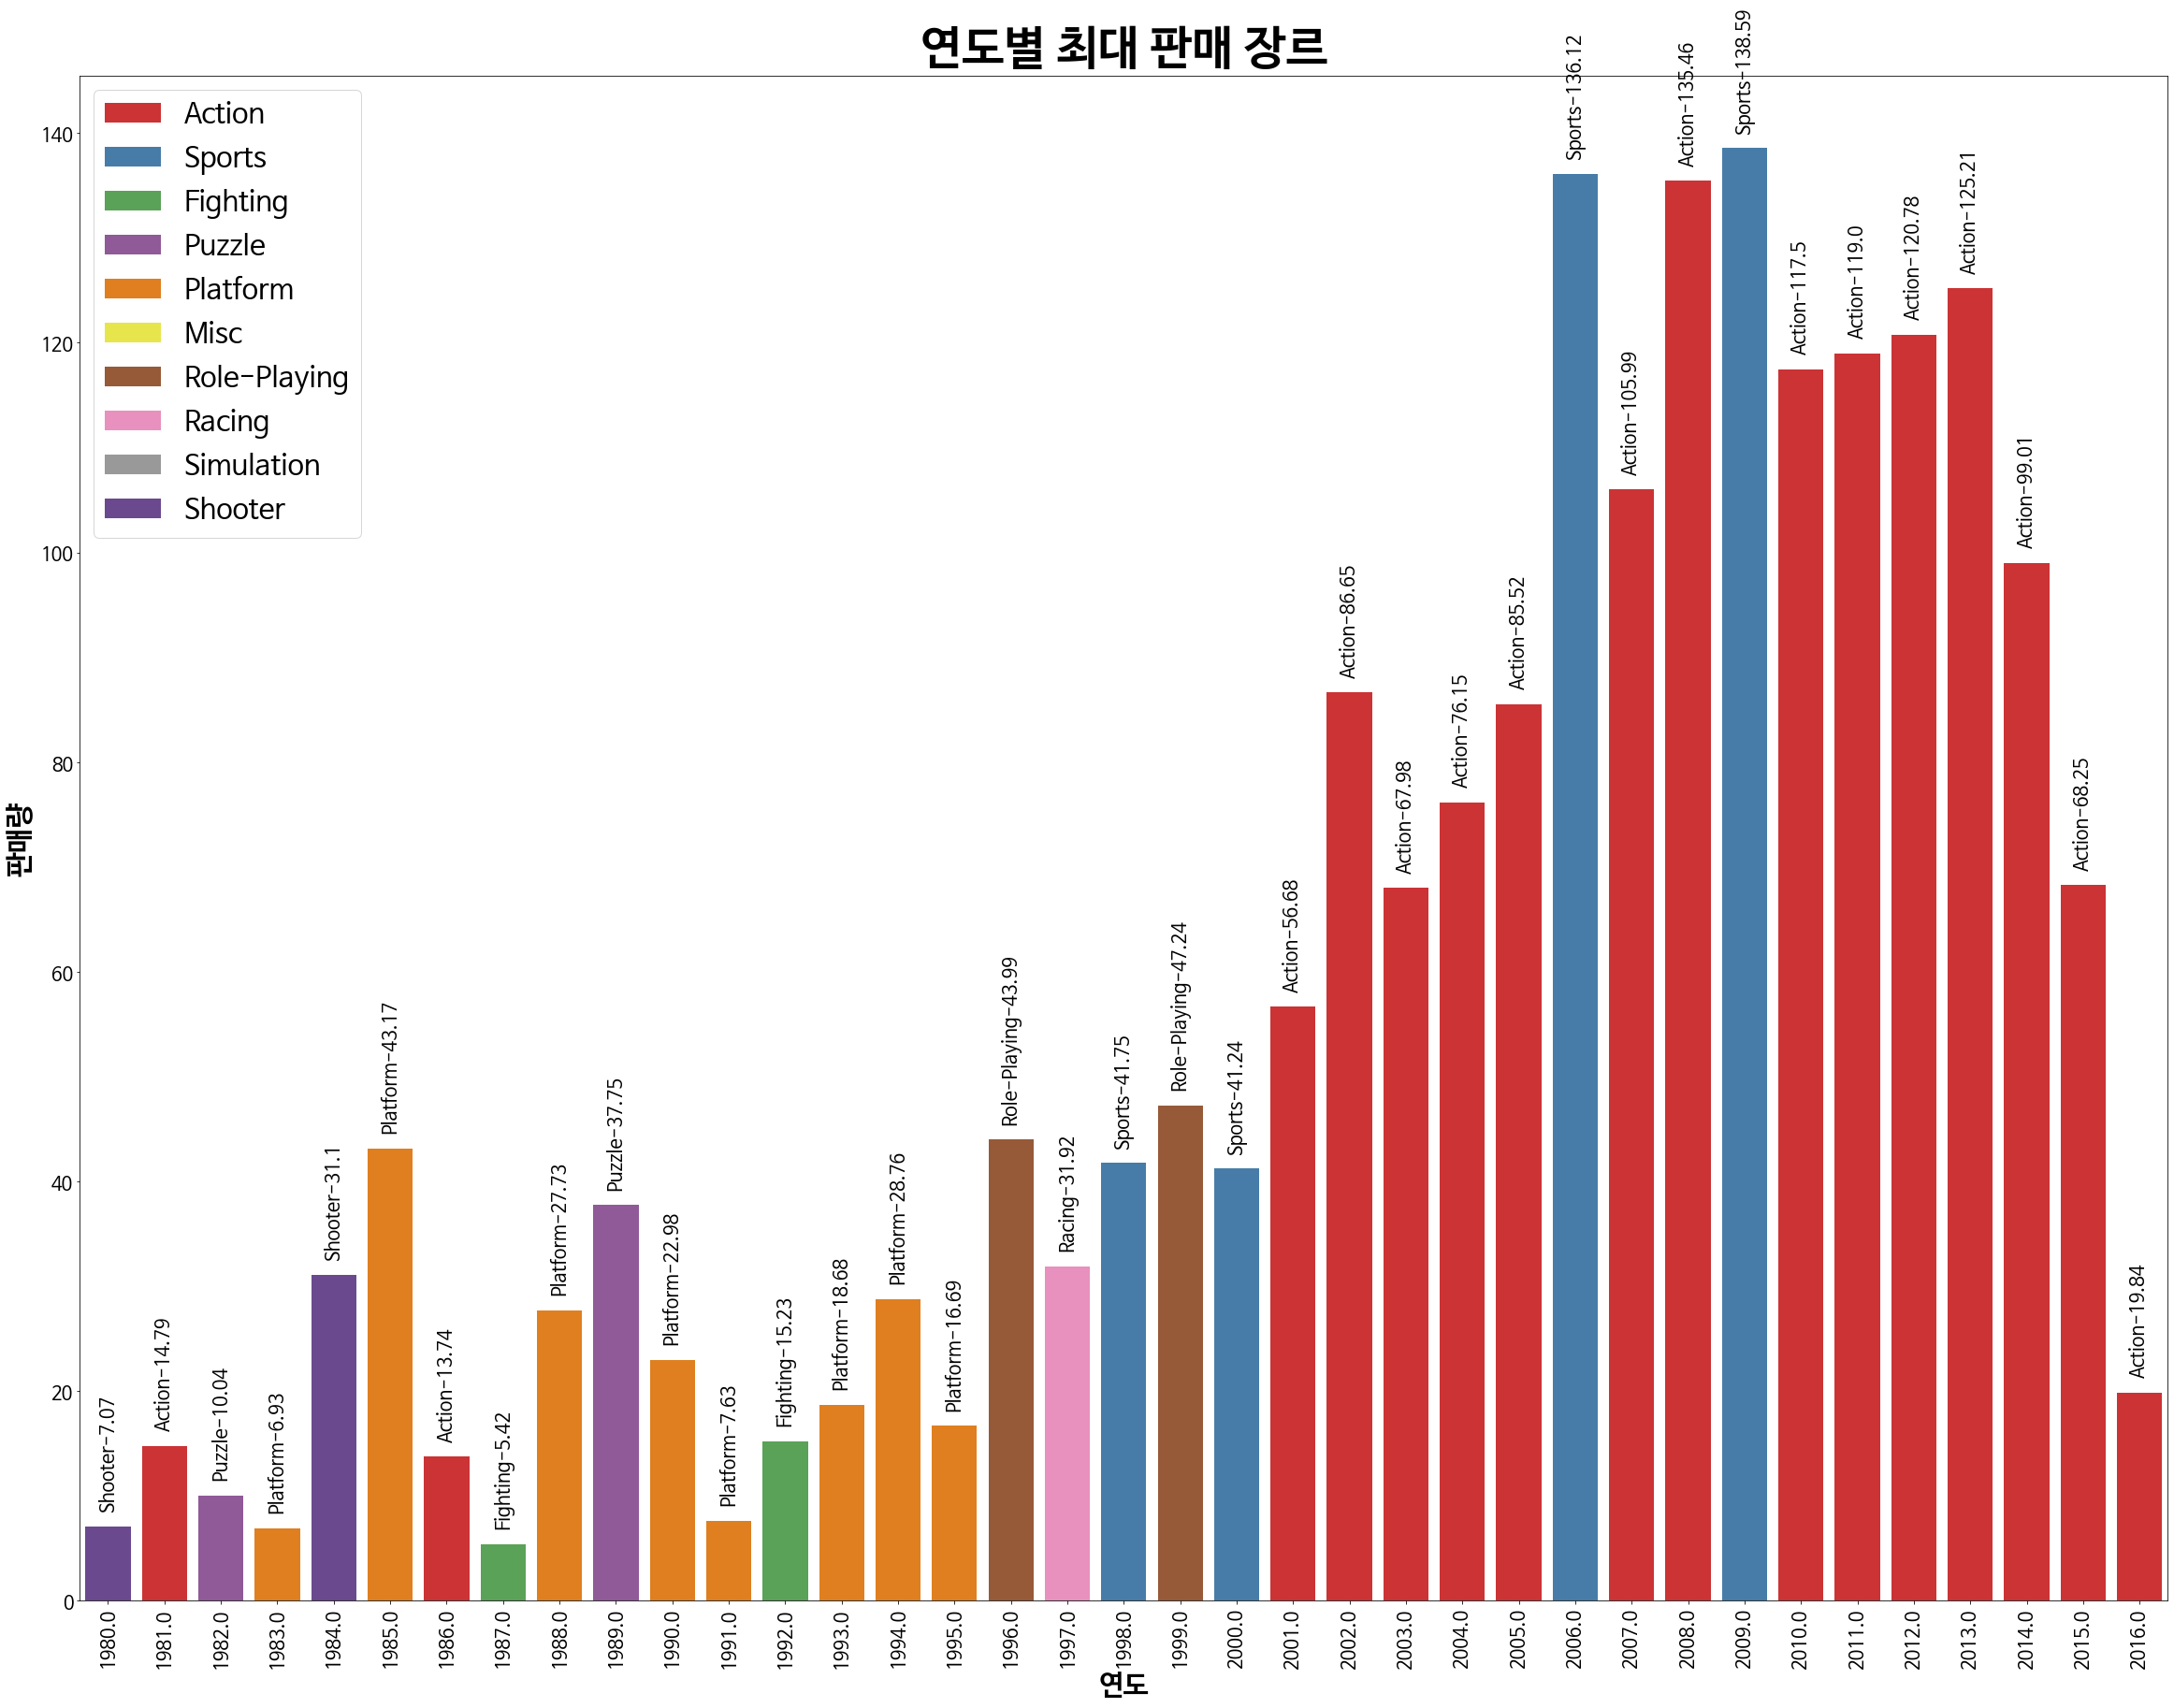

In [83]:
# figure
plt.figure(figsize=(40,30))
custom_palette = sns.color_palette("Set1")
sns.set_palette([custom_palette[0]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Action'])
sns.set_palette([custom_palette[1]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Sports'])
sns.set_palette([custom_palette[2]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Fighting'])
sns.set_palette([custom_palette[3]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Puzzle'])
sns.set_palette([custom_palette[4]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Platform'])
sns.set_palette([custom_palette[5]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Misc'])
sns.set_palette([custom_palette[6]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Role-Playing'])
sns.set_palette([custom_palette[7]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Racing'])
sns.set_palette([custom_palette[8]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Simulation'])
sns.set_palette([sns.color_palette("Paired")[9]])
barplot=sns.barplot(x='Year', y='Sum',hue='Genre', data=dfyg_s_max,hue_order=['Shooter'])
plt.legend(loc = 'upper left', prop={'size': 30})

# figure
genre=dfyg_s_max['Genre'].values
cnt = 0
for value in dfyg_s_max['Sum']:
    barplot.text(x=cnt, y=value + 2, s=str(genre[cnt] + '-' + str(round(value,2))),
            color='black', size=20, rotation=90, ha='center')
    cnt+=1
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

plt.title('연도별 최대 판매 장르',weight='bold',fontsize=50);
plt.xlabel('연도',weight='bold',fontsize=30);
plt.ylabel('판매량',weight='bold',fontsize=30);

In [53]:
df.groupby(['Year','Genre'])['Sum'].sum().reset_index()
# 데이터가 적은 Year Drop
df=df.drop(df[df['Year']==2017].index)
df=df.drop(df[df['Year']==2020].index)

# **출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [54]:
t100=df[df.Year>2010].sort_values(by='Sum',ascending=False)
t100=t100.head(100).reset_index(drop=True)

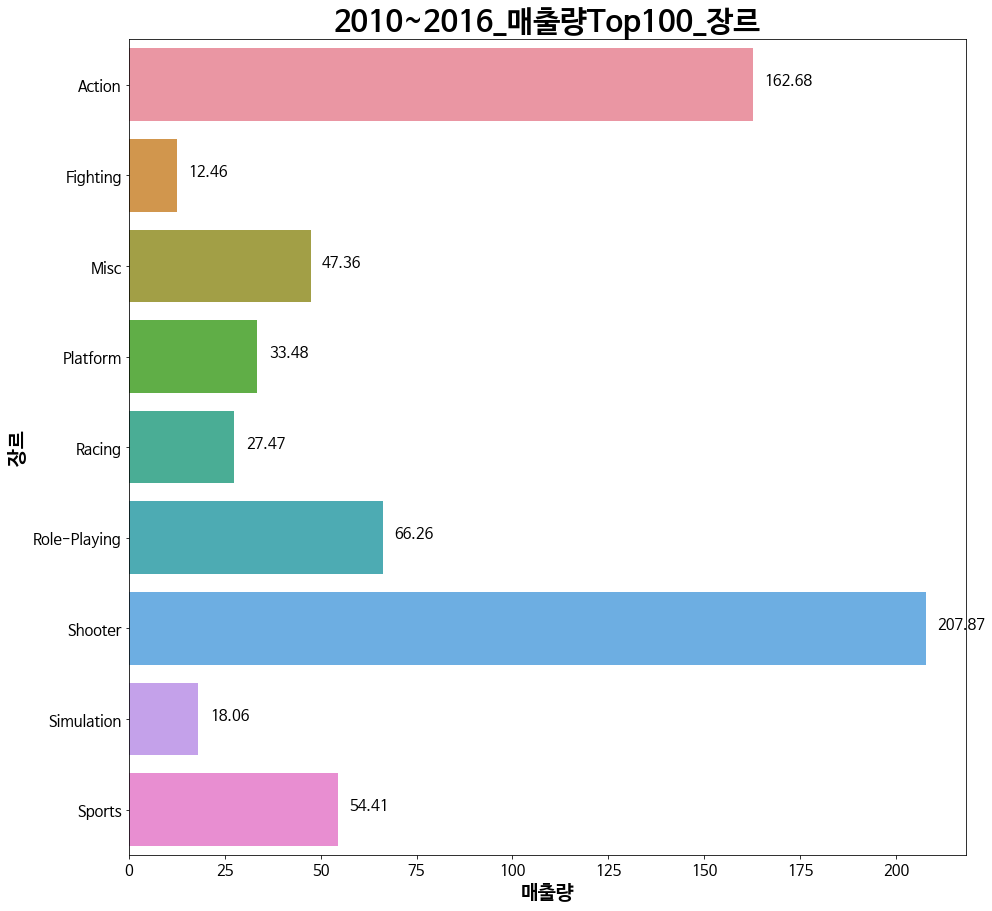

In [55]:
# top100 Genre 그래프
t100_genre=t100.groupby(['Genre'])['Sum'].sum().reset_index()
plt.figure(figsize=(15, 15))
figure=sns.barplot(x ='Sum', y='Genre', data=t100_genre)
cnt = 0
for value in t100_genre['Sum']:
    figure.text(x=value + 3, y=cnt, s=str(round(value,2)),
            color='black', size=15)
    cnt+=1
plt.title('2010~2016_매출량Top100_장르',weight='bold',fontsize=30);
plt.xlabel('매출량',weight='bold',fontsize=20);
plt.ylabel('장르',weight='bold',fontsize=20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

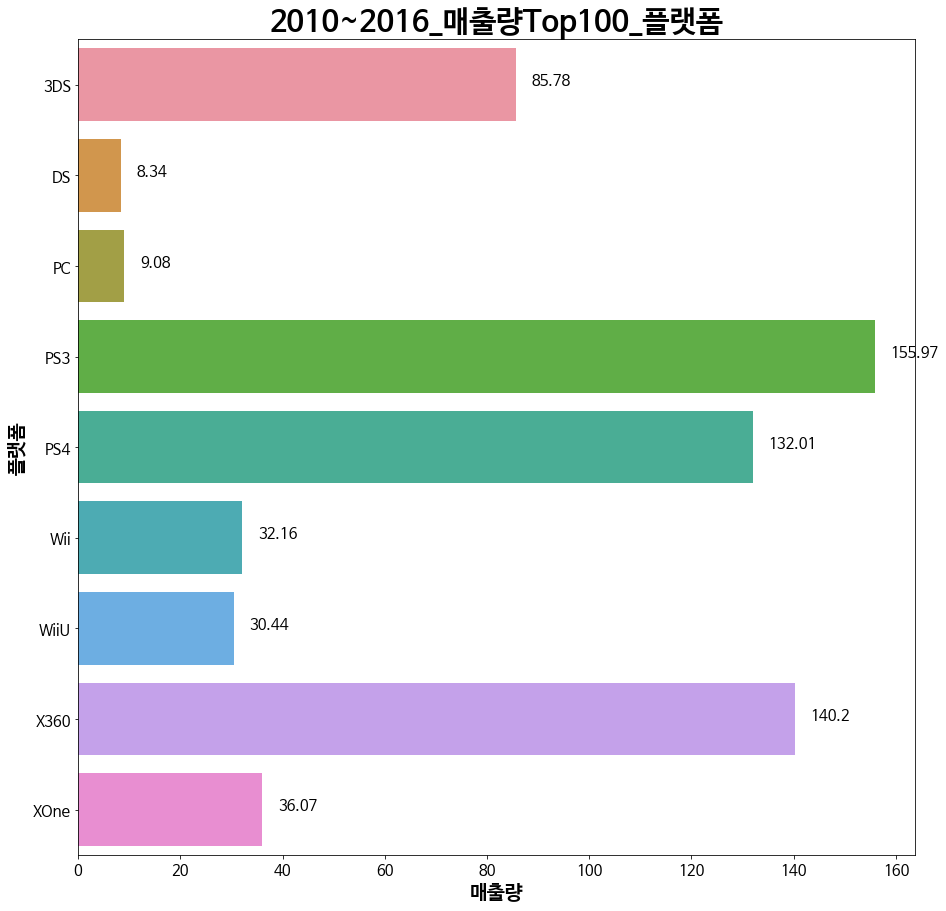

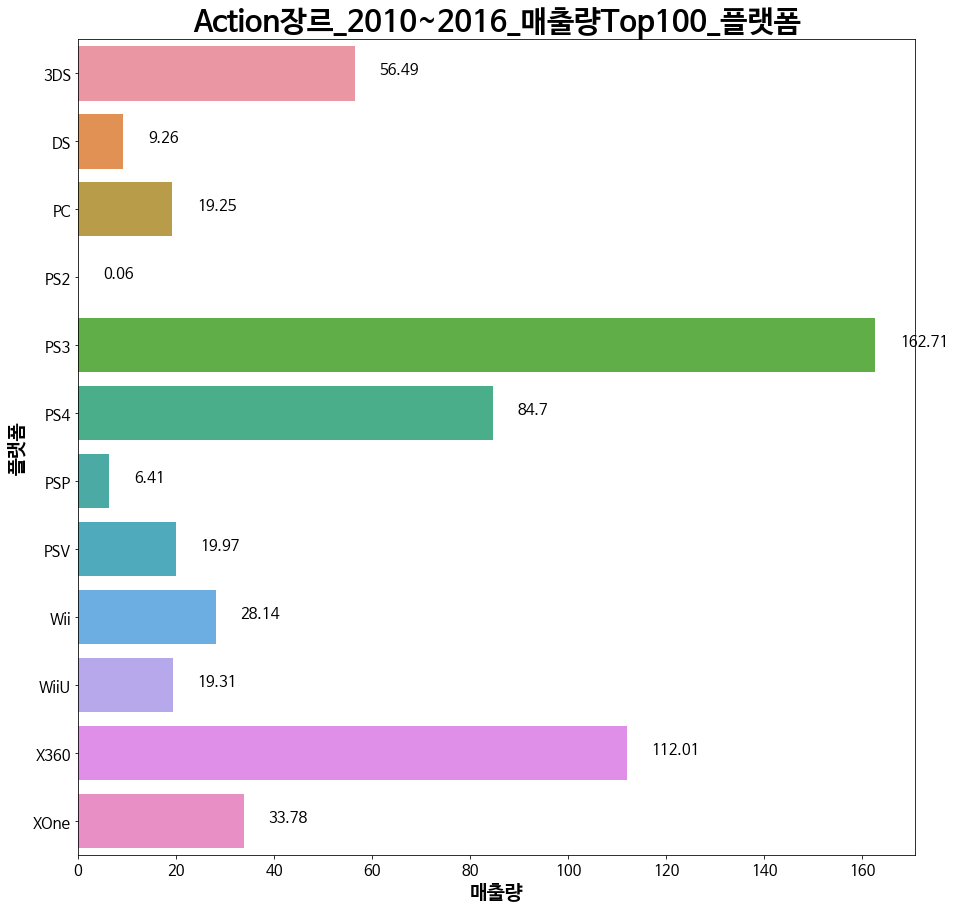

In [84]:
t100_=t100.groupby(['Platform'])['Sum'].sum().reset_index()
plt.figure(figsize=(15, 15))
figure=sns.barplot(x ='Sum', y='Platform', data=t100_)
cnt = 0
for value in t100_['Sum']:
    figure.text(x=value + 3, y=cnt, s=str(round(value,2)),
            color='black', size=15)
    cnt+=1
plt.title('2010~2016_매출량Top100_플랫폼',weight='bold',fontsize=30);
plt.xlabel('매출량',weight='bold',fontsize=20);
plt.ylabel('플랫폼',weight='bold',fontsize=20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);


Genre_filter=(df.Genre == 'Action') & (df.Year > 2010) # 조건식 작성
df_action=df.loc[Genre_filter].reset_index(drop = True)
df_action_platform=df_action.groupby(['Platform'])['Sum'].sum().reset_index()
platform=df_action_platform['Platform'].values
plt.figure(figsize=(15, 15))
df_action_platform_sales = sns.barplot(x ='Sum', y='Platform', data=df_action_platform)
cnt = 0
for value in df_action_platform['Sum']:
    df_action_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=15)
    cnt+=1
plt.title('Action장르_2010~2016_매출량Top100_플랫폼',weight='bold',fontsize=30);
plt.xlabel('매출량',weight='bold',fontsize=20);
plt.ylabel('플랫폼',weight='bold',fontsize=20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

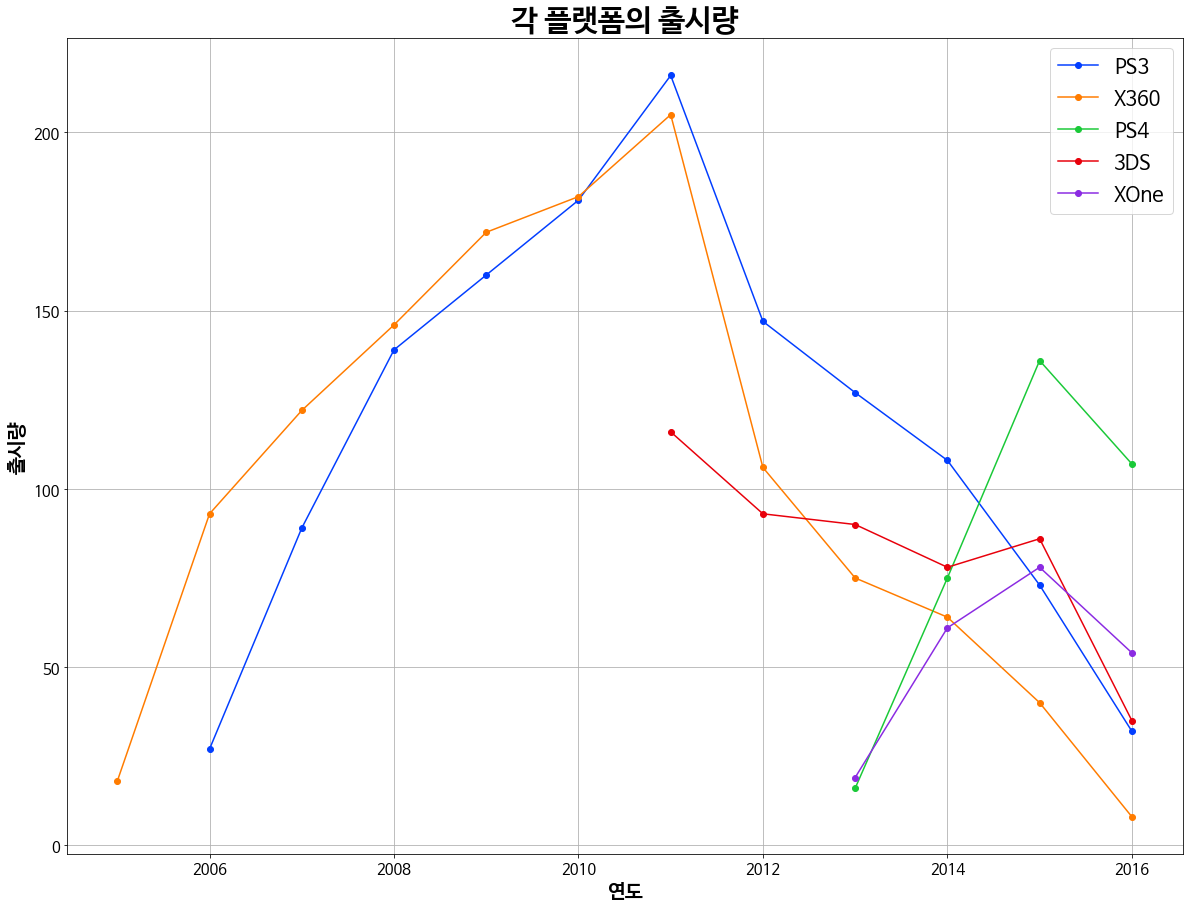

In [81]:
sns.set_palette('bright')
plt.figure(figsize=(20, 15))
# # 격자 여백 설정
# plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
PS3_filter = df.Platform == 'PS3' # 조건식 작성
df_PS3 = df.loc[PS3_filter]
df_PS3 = df_PS3.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_PS3['Year'], df_PS3['Count'],marker='o',label = 'PS3')

X360_filter = df.Platform == 'X360' # 조건식 작성
df_X360 = df.loc[X360_filter]
df_X360 = df_X360.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_X360['Year'], df_X360['Count'],marker='o',label = 'X360')

PS4_filter = df.Platform == 'PS4' # 조건식 작성
df_PS4 = df.loc[PS4_filter]
df_PS4 = df_PS4.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_PS4['Year'], df_PS4['Count'],marker='o',label = 'PS4')

DS3_filter = df.Platform == '3DS' # 조건식 작성
df_3DS = df.loc[DS3_filter]
df_3DS = df_3DS.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_3DS['Year'], df_3DS['Count'],marker='o',label = '3DS')

XOne_filter = df.Platform == 'XOne' # 조건식 작성
df_XOne = df.loc[XOne_filter]
df_XOne = df_XOne.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_XOne['Year'], df_XOne['Count'],marker='o',label = 'XOne')
plt.legend()
plt.grid()
plt.title('각 플랫폼의 출시량',weight='bold',fontsize=30);
plt.xlabel('연도',weight='bold',fontsize=20);
plt.ylabel('출시량',weight='bold',fontsize=20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc = 'upper right', prop={'size': 20})

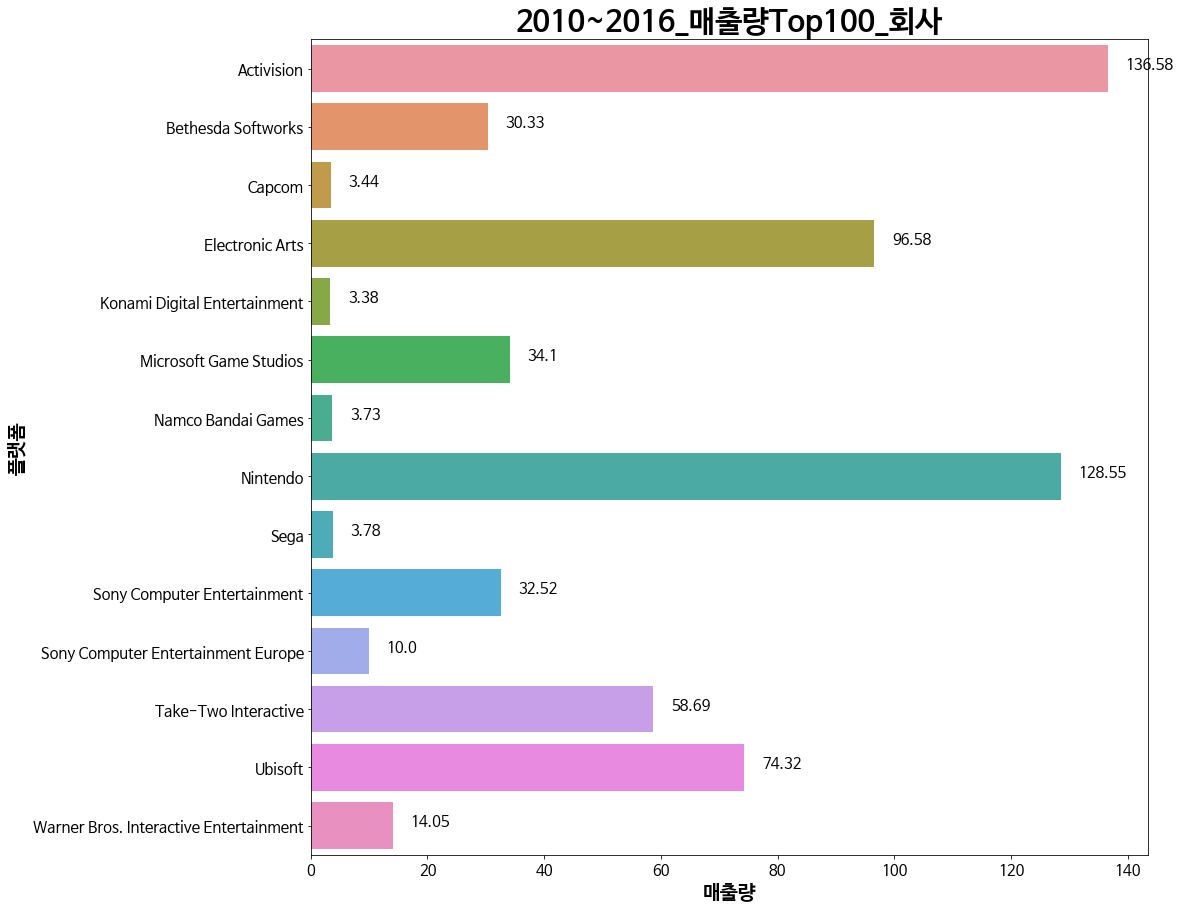

In [69]:
# top100 Publisher 그래프
t100_=t100.groupby(['Publisher'])['Sum'].sum().reset_index()
plt.figure(figsize=(15, 15))
figure=sns.barplot(x ='Sum', y='Publisher', data=t100_)
cnt = 0
for value in t100_['Sum']:
    figure.text(x=value + 3, y=cnt, s=str(round(value,2)),
            color='black', size=15)
    cnt+=1
plt.title('2010~2016_매출량Top100_회사',weight='bold',fontsize=30);
plt.xlabel('매출량',weight='bold',fontsize=20);
plt.ylabel('플랫폼',weight='bold',fontsize=20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

In [70]:
# top100 Publisher 그래프
t100=df[df.Year>2010].sort_values(by='Sum',ascending=False)
t100=t100.head(100).reset_index(drop=True)
t100[t100.Publisher=='Activision'].groupby(['Genre']).sum()

# PS3_filter = df.Platform == 'PS3' # 조건식 작성
# df_PS3 = df.loc[PS3_filter]
# t100_=t100.groupby(['Publisher'])['Sum'].sum().reset_index()
# plt.figure(figsize=(15, 15))
# figure=sns.barplot(x ='Sum', y='Publisher', data=t100_)
# cnt = 0
# for value in t100_['Sum']:
#     figure.text(x=value + 3, y=cnt, s=str(round(value,2)),
#             color='black', size=15)
#     cnt+=1
# plt.title('2010~2016_매출량Top100_회사',weight='bold',fontsize=30);
# plt.xlabel('매출량',weight='bold',fontsize=20);
# plt.ylabel('플랫폼',weight='bold',fontsize=20);
# plt.xticks(fontsize=15);
# plt.yticks(fontsize=15);


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum
Genre,,,,,,
Role-Playing,2012.0,2.43,2.15,0.00,0.62,5.20
Shooter,30199.0,65.61,46.88,2.67,16.22,131.38


Text(0, 0.5, '매출량')

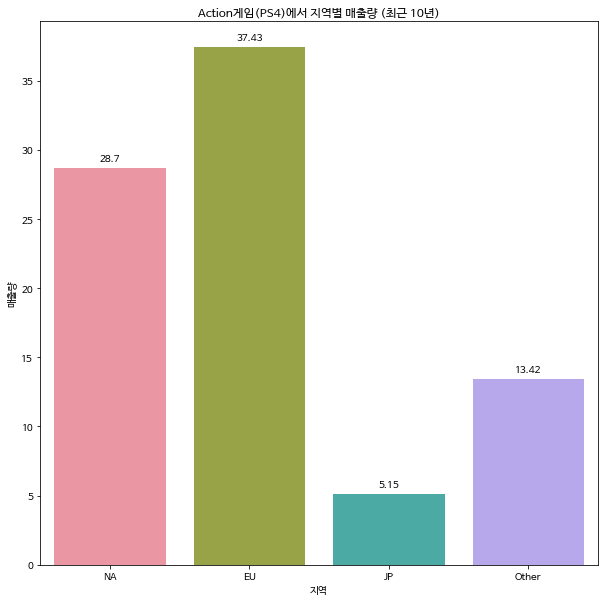

In [85]:
Platform_filter=(df_action.Platform=='PS4') # 조건식 작성
df_action_ps4=df_action.loc[Platform_filter].reset_index(drop = True)
df_action_ps4
plt.figure(figsize=(10,10))
locate_NA = df_action_ps4['NA_Sales'].sum()
locate_EU = df_action_ps4['EU_Sales'].sum()
locate_JP = df_action_ps4['JP_Sales'].sum()
locate_Other = df_action_ps4['Other_Sales'].sum()
locate_group = pd.DataFrame({'locate':['NA','EU','JP','Other'],'Sales':[locate_NA, locate_EU,locate_JP,locate_Other]})
locate_barplot = sns.barplot(x='locate', y='Sales',data=locate_group)
Sales = locate_group['Sales'].values
cnt = 0
for value in locate_group['Sales']:
    locate_barplot.text(x=cnt, y=value+0.5, s=str(str(round(value,2))),
            color='black', size=10, ha='center')
    cnt+=1
plt.title('Action게임(PS4)에서 지역별 매출량 (최근 10년)')
plt.xlabel('지역')
plt.ylabel('매출량')

# **ect**

In [ ]:
# missing_ID = retail[retail['CustomerID'].isnull()]
# missing_ID[missing_ID['InvoiceNo'].duplicated()]
# idx=df_y[df_y['Year']<1000].index
# dfyy.loc[idx]

In [ ]:

# yi.drop_duplicates(['Name'], keep='first')
#  a.insert(0, 4)
# yi_ar=np.array(yi,dtype=object)
# yi[0].index
# yi_ar.shape
df_y = pd.DataFrame({'Indext': yi.index, 'Name': yi.values})
# df_yi = pd.DataFrame(yi)#, columns=['Name'])#['key1','key2','col'])
# df_yi
# yi.drop_duplicates(['Name'], keep='first')
# yi_list=list(itertools.chain.from_iterable(yi))
# yi_list

In [ ]:
y0n=[]
for mn in missing_y['Name']:
  if mn in y0.loc[yi[n][0]]['Name']:
  for n in range(len(yi)):
  if y0.loc[yi[n][0]]['Name'] == missing_y['Name']:
    if y0.loc[yi[n][0]]['Publisher'] == missing_y[missing_y['Name']==y0.loc[yi[n][0]]['Name']]['Publisher']:
      y0n.append(y0.loc[yi[n][0]]['Name'].index)
    else:
      print('p x')
  else:
    print('n x')
df_list= ['kim_a', 'kim_b', 'kim_c', 'kim_k', 'seo_a', 'seo_b', 'seo_c', 'seo_s']
for col in df_list:
    if 'kim' not in col:
        print(col) 

ValueError: ignored